In [2]:
import pandas as pd

df = pd.read_csv('/Users/thomas/Documents/schoolwork/eco225/yelp_data/yelp_business.csv')
df2 = pd.read_csv('/Users/thomas/Documents/schoolwork/eco225/yelp_data/yelp_checkin.csv')
df3 = pd.read_csv('/Users/thomas/Documents/schoolwork/eco225/yelp_data/yelp_business_hours.csv')

bsn_df = df.copy()
checkin_df = df2.copy()
hours_df = df3.copy()

In [3]:
# find which cities have the most businesses in this dataset
bsn_df.groupby('city')['business_id'].count().nlargest()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: business_id, dtype: int64

In [4]:
# view all obs for which column refers to 'Toronto'
tor_bsn = bsn_df.loc[bsn_df['city'] == 'Toronto']

# drop unneeded columns
tor_bsn = tor_bsn.drop(['neighborhood', 'address', 'city', 'postal_code', 'latitude', 'longitude', 'state'], axis=1)

In [5]:
# generate a dummy for restaurants
tor_bsn['restaurant'] = tor_bsn['categories'].str.contains('Restaurant').astype(int)
tor_bsn

,business_id,name,stars,review_count,is_open,categories,restaurant
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",3.0,12,0,Italian;French;Restaurants,1
20,lHYiCS-y8AFjUitv6MGpxg,"""Starbucks""",4.0,21,1,Food;Coffee & Tea,0
24,VSGcuYDV3q-AAZ9ZPq4fBQ,"""Sportster's""",2.5,7,1,Bars;Sports Bars;Nightlife,0
25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars,1
27,AtdXq_gu9NTE5rx4ct_dGg,"""DAVIDsTEA""",4.0,6,1,Coffee & Tea;Food;Tea Rooms,0
...,...,...,...,...,...,...,...
174531,dWoAayHRyIrkk1dcvBxv3Q,"""Art Ink Collective""",3.5,3,1,Shopping;Beauty & Spas;Piercing;Art Galleries;...,0
174536,xqNpOnxY0XzdnUE4sjmg0w,"""Chaska""",4.0,4,0,Food;Grocery;Restaurants;Coffee & Tea;Indian,1
174543,SvW3WsatQWvR8c1iwAD_QA,"""Urban House Cafe""",4.0,32,0,Nightlife;Restaurants;Sandwiches;Bars;Canadian...,1
174544,nGjEV4bn0DPk8bcb0C6Aig,"""Sweet Serendipity Bake Shop""",4.5,22,1,Bakeries;Food,0


In [6]:
# checkin data: find average daily checkins for each toronto business
all_checks = checkin_df.groupby('business_id').mean().rename(columns={'checkins': 'daily_checkin_avg'})
all_checks

,daily_checkin_avg
business_id,
--6MefnULPED_I942VcFNA,2.673077
--7zmmkVg-IMGaXbuVd0SQ,3.400000
--8LPVSo5i0Oo61X01sV9A,1.000000
--9QQLMTbFzLJ_oT-ON3Xw,1.178571
--9e1ONYQuAa-CB_Rrw7Tw,18.608696
...,...
zzvlwkcNR1CCqOPXwuvz2A,1.000000
zzwaS0xn1MVEPEf0hNLjew,8.626506
zzwhN7x37nyjP0ZM8oiHmw,1.434783


In [7]:
# merge checkin data with toronto businesses
tor_df = tor_bsn.merge(all_checks, on='business_id')
tor_df

,business_id,name,stars,review_count,is_open,categories,restaurant,daily_checkin_avg
0,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",3.0,12,0,Italian;French;Restaurants,1,1.000000
1,lHYiCS-y8AFjUitv6MGpxg,"""Starbucks""",4.0,21,1,Food;Coffee & Tea,0,4.577586
2,VSGcuYDV3q-AAZ9ZPq4fBQ,"""Sportster's""",2.5,7,1,Bars;Sports Bars;Nightlife,0,2.125000
3,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars,1,1.333333
4,AtdXq_gu9NTE5rx4ct_dGg,"""DAVIDsTEA""",4.0,6,1,Coffee & Tea;Food;Tea Rooms,0,1.272727
...,...,...,...,...,...,...,...,...
14845,sEAKw3MZkER1u_1fzIeD3g,"""Gol Take-Out""",4.0,15,1,Food;Restaurants;International Grocery;Ethnic ...,1,1.000000
14846,1HplwLVbBid-Bgw1sEPGFg,"""Dumpling Melody Bistro""",2.0,12,1,Restaurants;Chinese,1,1.125000
14847,dWoAayHRyIrkk1dcvBxv3Q,"""Art Ink Collective""",3.5,3,1,Shopping;Beauty & Spas;Piercing;Art Galleries;...,0,1.000000
14848,SvW3WsatQWvR8c1iwAD_QA,"""Urban House Cafe""",4.0,32,0,Nightlife;Restaurants;Sandwiches;Bars;Canadian...,1,2.000000


In [8]:
# generate summary statistics for stars (y variable)
tor_df['stars'].describe()

count    14850.000000
mean         3.494007
std          0.841782
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64

In [9]:
# generate summary statistics for review_count (x variable 1)
tor_df['review_count'].describe()

count    14850.000000
mean        28.295556
std         56.253223
min          3.000000
25%          5.000000
50%         10.000000
75%         28.000000
max       1494.000000
Name: review_count, dtype: float64

In [10]:
# generate summary statistics for daily_checkin_avg (x variable 2)
tor_df['daily_checkin_avg'].describe()

count    14850.000000
mean         1.522870
std          1.090018
min          1.000000
25%          1.000000
50%          1.187500
75%          1.555556
max         31.042553
Name: daily_checkin_avg, dtype: float64

array([[<AxesSubplot: title={'center': 'stars'}>,
        <AxesSubplot: title={'center': 'review_count'}>],
       [<AxesSubplot: title={'center': 'daily_checkin_avg'}>,
        <AxesSubplot: >]], dtype=object)

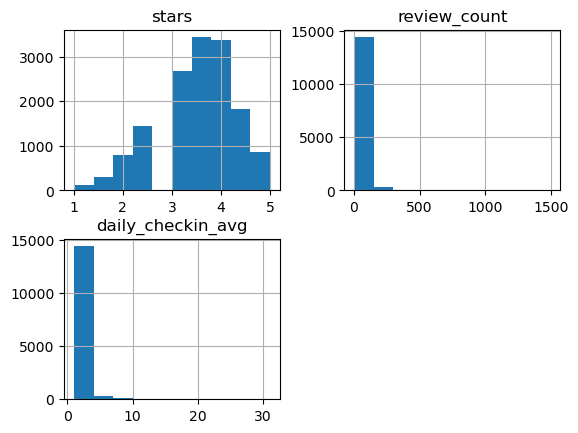

In [11]:
# generate histogram
tor_df.hist(column=['stars', 'review_count', 'daily_checkin_avg'])
# kinda useless

/Users/thomas/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='review_count', ylabel='stars'>

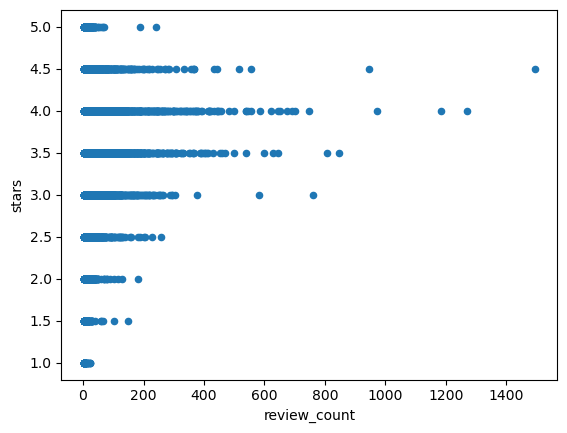

In [12]:
# scatter plot: stars on review_count
tor_df.plot.scatter('review_count', 'stars')

<AxesSubplot: xlabel='daily_checkin_avg', ylabel='stars'>

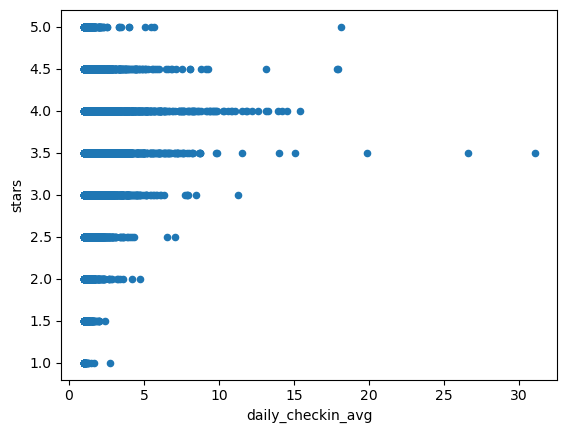

In [13]:
# scatter plot: stars on daily_checkin_avg
tor_df.plot.scatter('daily_checkin_avg', 'stars')

In [14]:
# toronto restaurants dataset
tor_rst = tor_df.groupby('restaurant').get_group(1)
tor_rst.shape

(6890, 8)

In [15]:
# function to find operating time on each weekday

def count_hours(operating_hours: str) -> pd.Timedelta:
    """Returns a timedelta given a string that contains a business's operating hours."""

    if operating_hours == 'None':
        return 0.0 

    hours = operating_hours.split('-')

    opn = pd.to_datetime('2000-01-01 ' + hours[0])
    close = pd.to_datetime('2000-01-01 ' + hours[1])

    if close < opn:
        end_date = '2000-01-02'
    else:
        end_date = '2000-01-01'

    window = pd.to_timedelta(pd.to_datetime(f'{end_date} ' + hours[1]) - pd.to_datetime('2000-01-01 ' + hours[0]))
    return window.total_seconds() / (60 * 60)


In [16]:
tor_rst = tor_rst.merge(hours_df, on='business_id')
tor_rst

,business_id,name,stars,review_count,is_open,categories,restaurant,daily_checkin_avg,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",3.0,12,0,Italian;French;Restaurants,1,1.000000,9:0-22:0,9:0-22:0,9:0-22:0,9:0-22:0,9:0-22:0,9:0-22:0,9:0-22:0
1,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars,1,1.333333,11:30-2:0,11:30-2:0,11:30-2:0,11:30-2:0,11:30-2:0,10:30-2:0,10:30-2:0
2,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",5.0,3,1,Restaurants;Breakfast & Brunch,1,1.000000,7:0-15:0,7:0-15:0,7:0-15:0,7:0-15:0,7:0-15:0,7:0-15:0,7:0-15:0
3,FXHfcFVEfI1vVngW2gVOpw,"""Bampot House of Tea & Board Games""",4.0,55,1,Coffee & Tea;Restaurants;Food;Mediterranean;Te...,1,1.352941,17:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,12:0-1:30,12:0-1:30,12:0-23:0
4,VXH7zXcZzXlmAVN8GSjGRQ,"""Thai Express""",3.0,5,1,Imported Food;Specialty Food;Thai;Ethnic Food;...,1,1.000000,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,11:0-22:0,11:0-22:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,Ue2H-ajY-uBKwGoBDQutCA,"""Wok & Fortune""",1.0,4,1,Caribbean;Chinese;Restaurants,1,1.076923,None,11:30-22:15,11:30-22:15,11:30-22:15,11:30-23:15,11:30-23:15,12:0-22:0
6886,3zIy2T1bRwxvK-dRmopS_g,"""Ali Baba""",1.0,4,1,Middle Eastern;Restaurants,1,1.000000,None,None,None,None,None,None,None
6887,sEAKw3MZkER1u_1fzIeD3g,"""Gol Take-Out""",4.0,15,1,Food;Restaurants;International Grocery;Ethnic ...,1,1.000000,None,None,None,None,None,None,None
6888,1HplwLVbBid-Bgw1sEPGFg,"""Dumpling Melody Bistro""",2.0,12,1,Restaurants;Chinese,1,1.125000,None,None,None,None,None,None,None


In [17]:
for col in hours_df.columns[-7:]:
    tor_rst[str(col) + '_window'] = tor_rst[col].apply(count_hours)

In [18]:
tor_rst['weekly_hours'] = tor_rst[['monday_window', 'tuesday_window', 'wednesday_window',\
        'thursday_window', 'friday_window', 'saturday_window', 'sunday_window']].sum(axis=1)
tor_rst = tor_rst.drop(columns=['monday_window', 'tuesday_window', 'wednesday_window',\
                                'thursday_window', 'friday_window', 'saturday_window', 'sunday_window',\
                                'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',\
                                'sunday', 'restaurant'])

In [19]:
tor_rst

,business_id,name,stars,review_count,is_open,categories,daily_checkin_avg,weekly_hours
0,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",3.0,12,0,Italian;French;Restaurants,1.000000,91.00
1,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars,1.333333,103.50
2,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",5.0,3,1,Restaurants;Breakfast & Brunch,1.000000,56.00
3,FXHfcFVEfI1vVngW2gVOpw,"""Bampot House of Tea & Board Games""",4.0,55,1,Coffee & Tea;Restaurants;Food;Mediterranean;Te...,1.352941,80.00
4,VXH7zXcZzXlmAVN8GSjGRQ,"""Thai Express""",3.0,5,1,Imported Food;Specialty Food;Thai;Ethnic Food;...,1.000000,87.00
...,...,...,...,...,...,...,...,...
6885,Ue2H-ajY-uBKwGoBDQutCA,"""Wok & Fortune""",1.0,4,1,Caribbean;Chinese;Restaurants,1.076923,65.75
6886,3zIy2T1bRwxvK-dRmopS_g,"""Ali Baba""",1.0,4,1,Middle Eastern;Restaurants,1.000000,0.00
6887,sEAKw3MZkER1u_1fzIeD3g,"""Gol Take-Out""",4.0,15,1,Food;Restaurants;International Grocery;Ethnic ...,1.000000,0.00
6888,1HplwLVbBid-Bgw1sEPGFg,"""Dumpling Melody Bistro""",2.0,12,1,Restaurants;Chinese,1.125000,0.00


In [20]:
tor_rst.to_csv('toronto_restaurants.csv')